In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

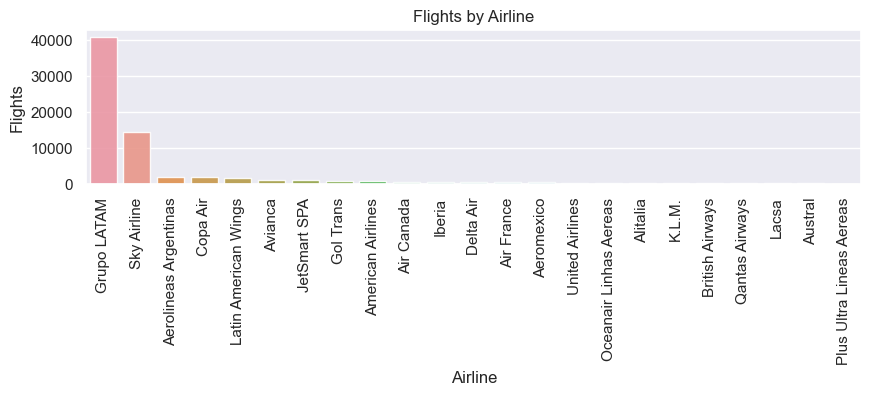

In [4]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

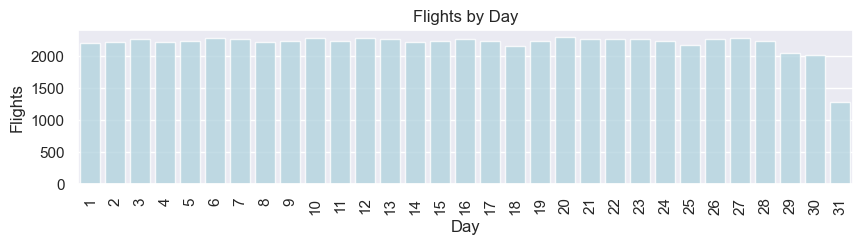

In [5]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

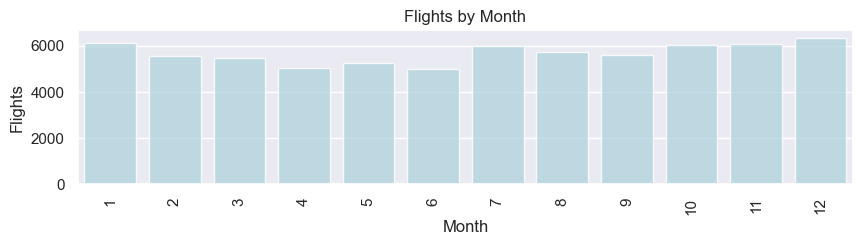

In [6]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

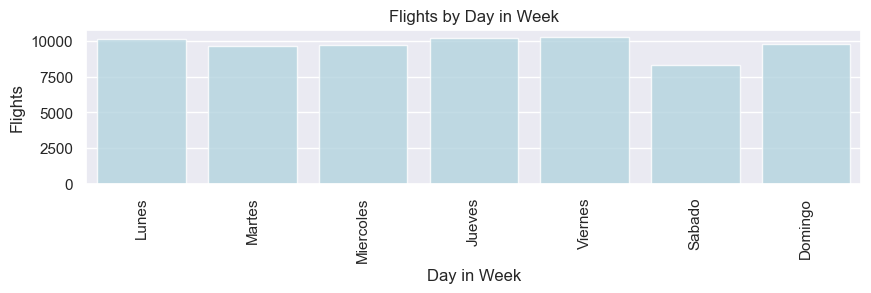

In [7]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

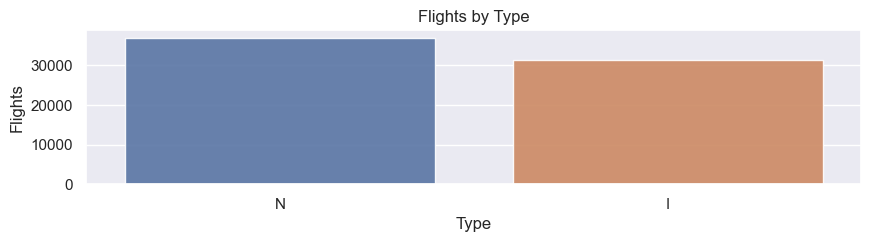

In [8]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

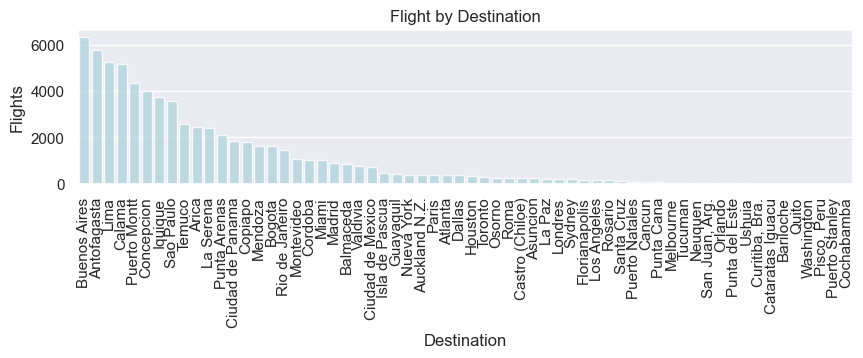

In [9]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [10]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [11]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [12]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [13]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [14]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [15]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [16]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [17]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [18]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

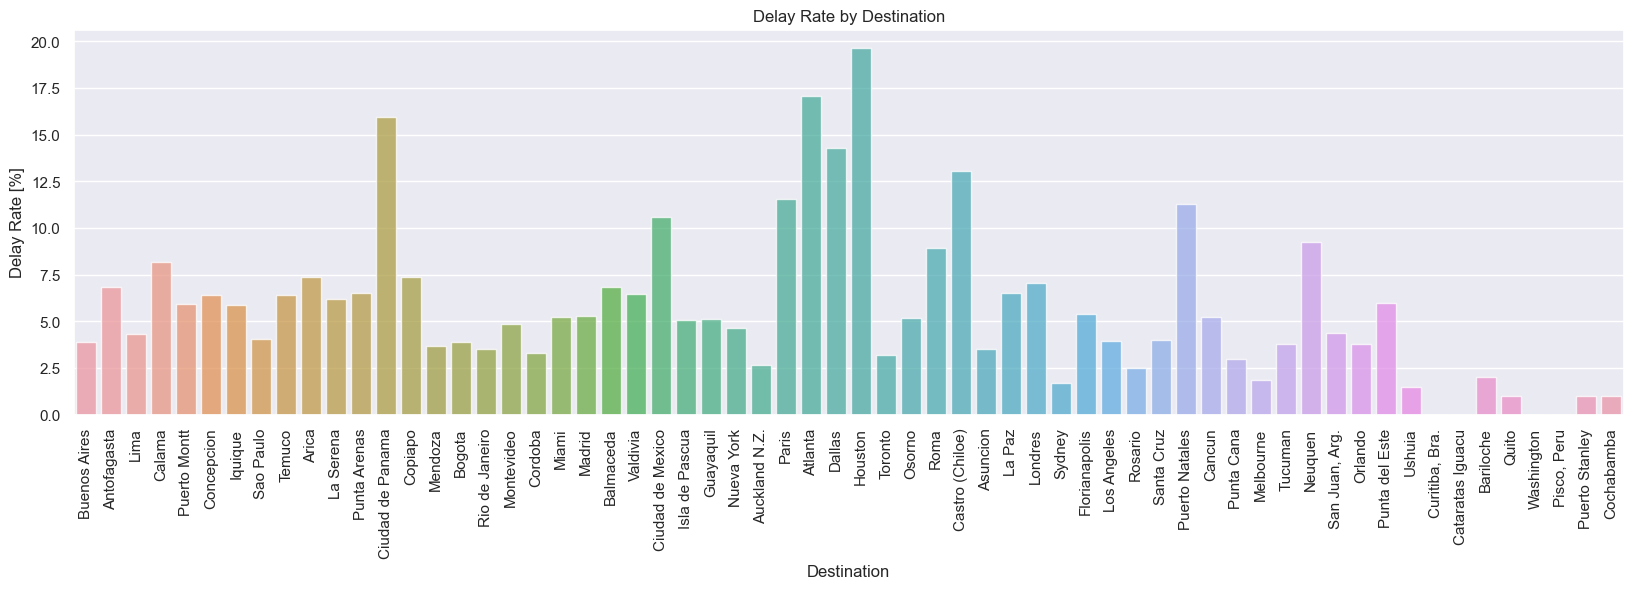

In [21]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()

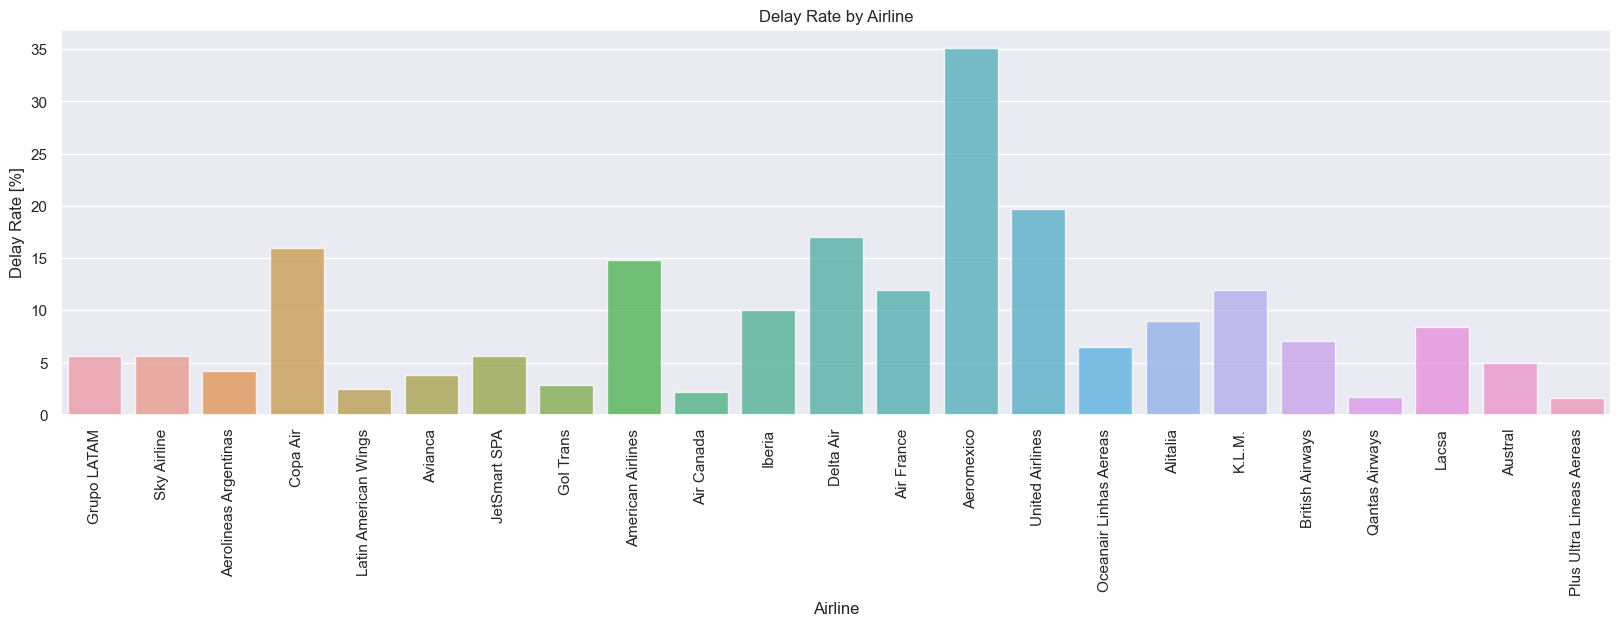

In [22]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y = airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

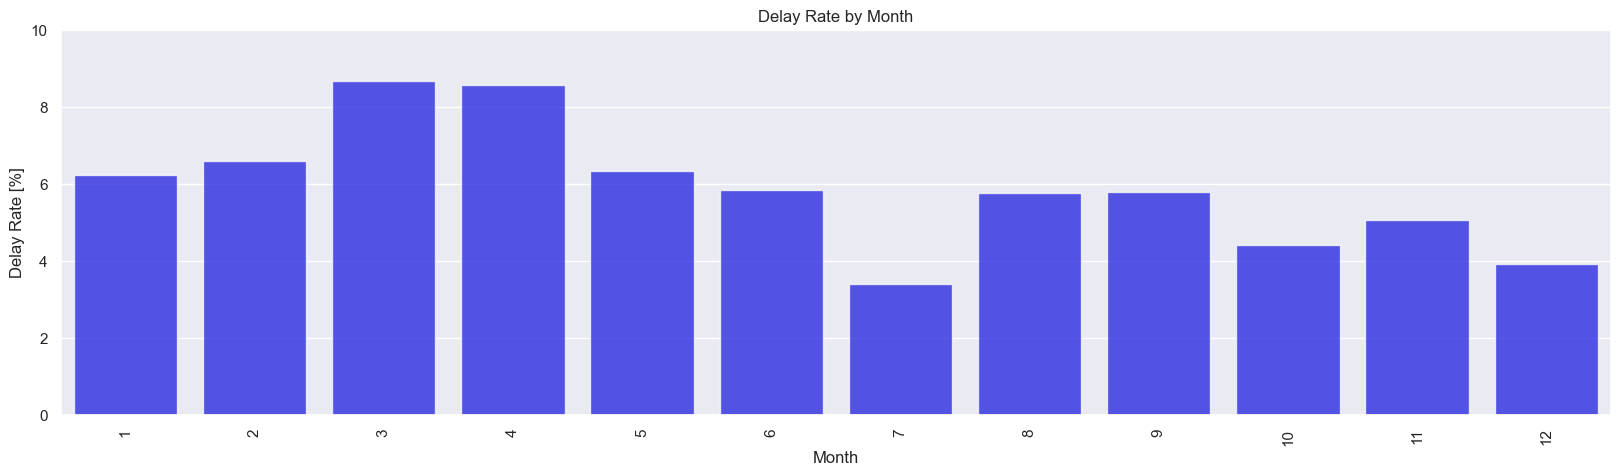

In [23]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

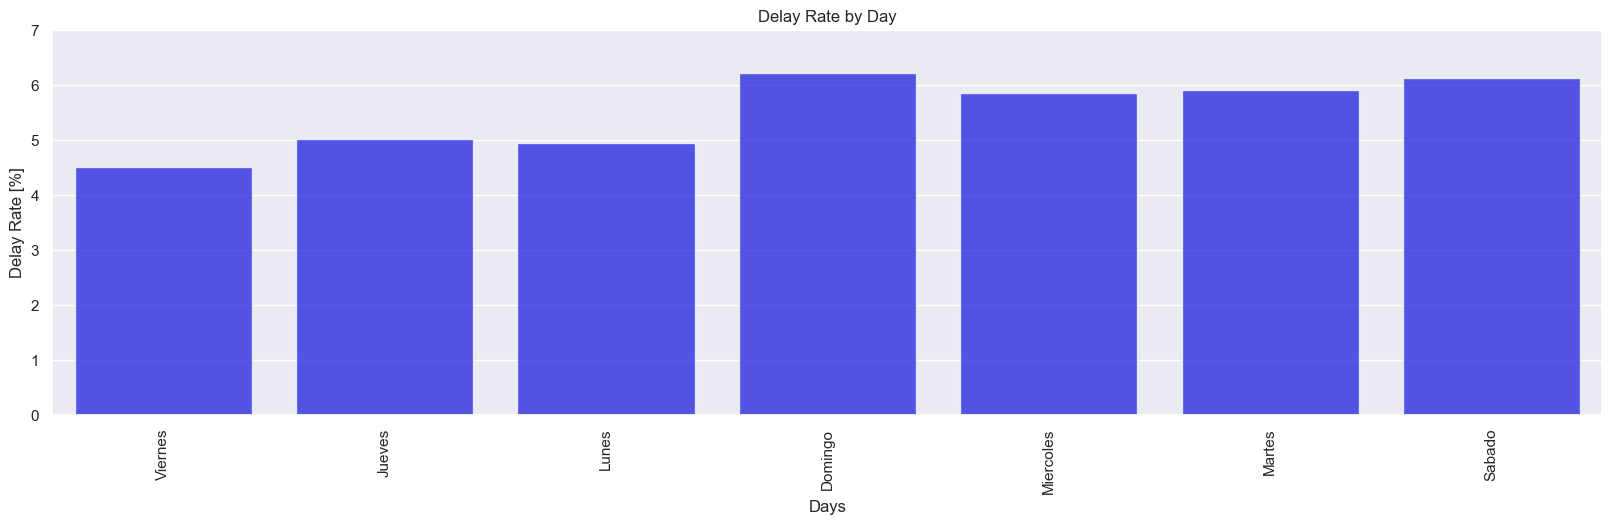

In [24]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

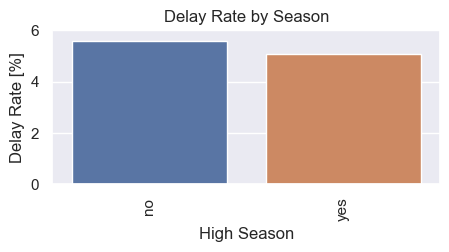

In [25]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

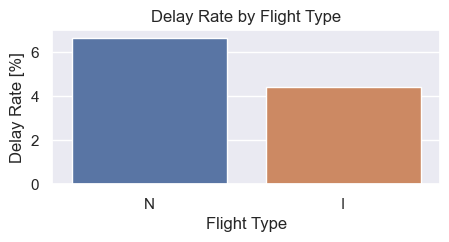

In [26]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0,7)
plt.show()

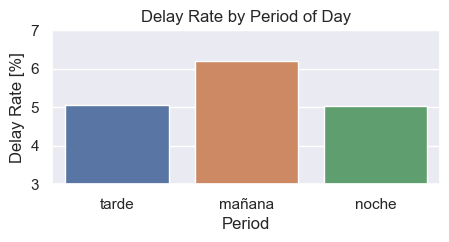

In [27]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(3,7)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [30]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [32]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [33]:
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [34]:
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [37]:
import xgboost as xgb
from xgboost import plot_importance

In [38]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [39]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [40]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]], dtype=int64)

In [41]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
reg_y_preds = reg_model.predict(x_test)

In [45]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]], dtype=int64)

In [46]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

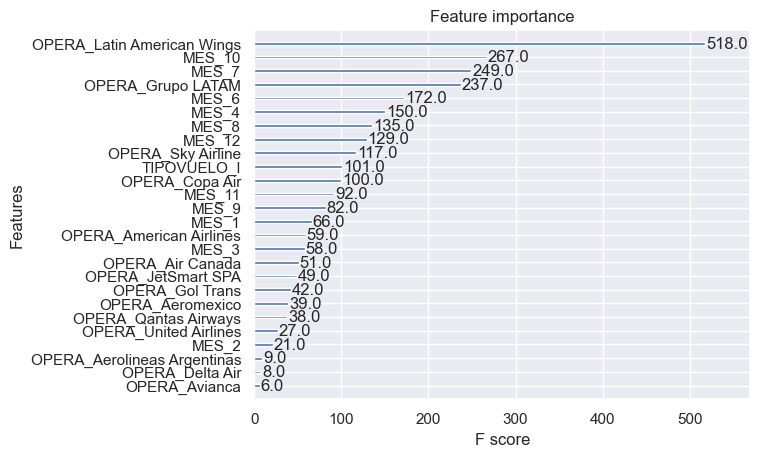

In [47]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [48]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [49]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [50]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [51]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [52]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [53]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9556, 8738],
       [1313, 2901]], dtype=int64)

In [54]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66     18294
           1       0.25      0.69      0.37      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.61      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [55]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [56]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [57]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18286,     8],
       [ 4188,    26]], dtype=int64)

In [58]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.76      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.79      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [59]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [60]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [61]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]], dtype=int64)

In [62]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [63]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [64]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [65]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]], dtype=int64)

In [66]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**

# 8. DS Complement
Section to complement the DS work. Pre processing Pipeline, Balancing Techniques, ML Models, Model Selection

In [67]:
# Based on the DS varaibles job
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'DIANOM', 'high_season', 'period_day','delay']], random_state = 111)

In [68]:
training_data.info()
# OPERA: Airline's names {categorical-nominal}, has 23 unique values.
# MES: month {numerical-ordinal}, has 12 unique values.
# TIPOVUELO: I =International, N =National {categorical-nominal}, has 2 unique values.
# DIANOM: Day of week of the Flight operation {categorical-ordinal}, has 7 unique values.
# high_season: {categorical-binary}
# period_day: {categorical-nominal}
# delay: binary value for condition delay>15mins -> [1:true | 0:false] {categorical-binary}, has 2 unique values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 13375 to 10196
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OPERA        68206 non-null  object
 1   MES          68206 non-null  int64 
 2   TIPOVUELO    68206 non-null  object
 3   DIANOM       68206 non-null  object
 4   high_season  68206 non-null  int64 
 5   period_day   66976 non-null  object
 6   delay        68206 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 3.9+ MB


## 8.1 Days Codification

In [69]:
# Map dictionary for days
dianom_dict = {
    'lunes': 1,
    'martes': 2,
    'miercoles': 3,
    'jueves': 4,
    'viernes': 5,
    'sabado': 6,
    'domingo': 7
}

training_data['DIANOM'] = training_data['DIANOM'].str.lower().map(dianom_dict)
training_data.sample(2)

,OPERA,MES,TIPOVUELO,DIANOM,high_season,period_day,delay
23424,Sky Airline,5,N,3,0,mañana,0
38450,Air Canada,8,I,5,0,mañana,1


## 8.2 Pipeline de Preprocesamiento

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

#*****************************

# Variables numéricas
numerical_features = ['MES', 'DIANOM']

#Variables categóricas
categorical_features = ['OPERA', 'TIPOVUELO', 'high_season', 'period_day']
#*****************************

# Clasificación Features y Target
X = training_data.drop(columns=['delay'])
y = training_data['delay']

# División conjunto Entrenamiento  y Test (IMPORTANTE STRATIFY -> porque es un dataset desblanceado)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#*****************************
# PIPELINE DE PREPROCESAMIENTO:

# Pipeline para características numéricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Settear valores faltantes con la media
    ('scaler', StandardScaler())  # Estandarizar los Features
])

# Pipeline para características categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Settear valores faltantes con el valor más frecuente (moda)
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar variabes categóricas
])

# Combinar transformadores para características numéricas y categóricas
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features), # Aplicar transformaciones numéricas
    ('cat', cat_transformer, categorical_features) # Aplicar transformaciones categóricas
])


X_train_processed = preprocessor.fit_transform(X_train3)
X_test_processed = preprocessor.transform(X_test3)


# # Convertir nuevamente en el formato de Dataframe:
# # {
processed_columns = (numerical_features +
                     list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))  

# Convert sparse matrices to DataFrames
X_train_processed_df = pd.DataFrame.sparse.from_spmatrix(X_train_processed, columns=processed_columns)
X_test_processed_df = pd.DataFrame.sparse.from_spmatrix(X_test_processed, columns=processed_columns)
#}
X_train_processed_df

,MES,DIANOM,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,...,OPERA_Sky Airline,OPERA_United Airlines,TIPOVUELO_I,TIPOVUELO_N,high_season_0,high_season_1,period_day_mañana,period_day_noche,period_day_tarde,period_day_None
0,-0.461846,-1.484070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.241098,0.522392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.389626,-0.480839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.957274,-0.480839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.178022,0.522392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54559,-0.178022,-0.982455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
54560,-1.313318,1.525623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
54561,-1.313318,-0.982455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
54562,-1.597142,0.522392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [131]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(X_train_processed_df, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

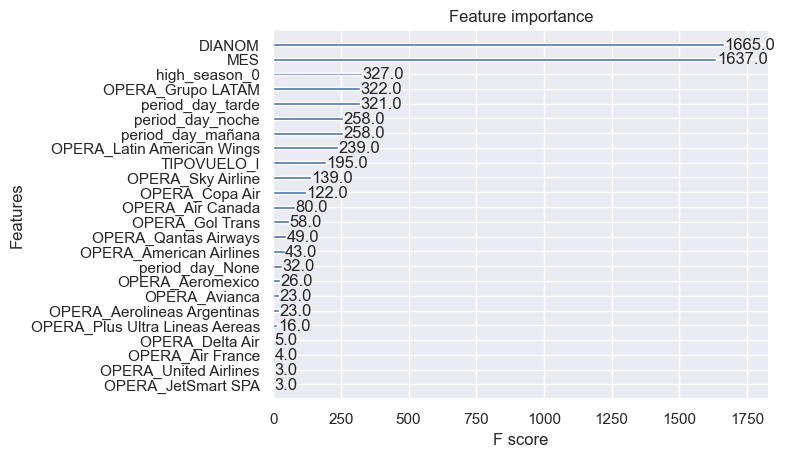

In [132]:
xgboost_y_preds = xgb_model.predict(X_test_processed_df)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [133]:
top_10_vars = ["DIANOM", "MES", "high_season_0",  "OPERA_Grupo LATAM", "period_day_tarde", "period_day_noche", "period_day_mañana", "OPERA_Latin American Wings", "TIPOVUELO_I", "OPERA_Sky Airline"]

## 8.3 Balancing Techniques

In [134]:
# Tecnicas de Balanceo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Tunning de Modelos
from sklearn.model_selection import GridSearchCV

# Evaluación de Modelos
from sklearn.metrics import make_scorer, roc_auc_score

In [135]:
# Filtrar Features con respecto al TOP_VARS
X_train_processed_df = X_train_processed_df[top_10_vars]
X_test_processed_df = X_test_processed_df[top_10_vars]

# Definir las técnicas de remuestreo
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

# Definir el clasificador
rf_classifier = RandomForestClassifier(random_state=42)

# Definir los parámetros para Parameter Tunning
param_grid_rus = {
    'sampling_strategy': [0.5, 0.6, 0.7] 
}

param_grid_ros = {
    'sampling_strategy': [0.5, 0.6, 0.7] 
}


# Definir la métrica de puntuación
scoring = {
    'AUC': make_scorer(roc_auc_score),
    'Precisión': 'precision',
    'Recall': 'recall'
}

# Realizar GridSearchCV para RandomUnderSampler
grid_search_rus = GridSearchCV(estimator=rus, param_grid=param_grid_rus, scoring=scoring, cv=5, refit='AUC')
grid_search_rus.fit(X_train_processed_df, y_train3)

# Realizar GridSearchCV para RandomOverSampler
grid_search_ros = GridSearchCV(estimator=ros, param_grid=param_grid_ros, scoring=scoring, cv=5, refit='AUC')
grid_search_ros.fit(X_train_processed_df, y_train3)

# Obtener los mejores modelos
best_rus = grid_search_rus.best_estimator_
best_ros = grid_search_ros.best_estimator_

# Funcion FIt_resample de cada modelo sobre la data original
X_train_undersampled_rus, y_train_undersampled_rus = best_rus.fit_resample(X_train_processed_df, y_train3)
X_train_oversampled_ros, y_train_oversampled_ros = best_ros.fit_resample(X_train_processed_df, y_train3)
#X_train_smote, y_train_smote = smt.fit_resample(X_train_processed_df, y_train)
print('Undersamppled: ', len(X_train_undersampled_rus), '-', len(y_train_undersampled_rus))
print('Oversamppled: ',len(X_train_oversampled_ros), '-',len(y_train_oversampled_ros))
#print('SMOTE: ',len(X_train_smote), '-',len(y_train_smote))

Undersamppled:  30273 - 30273
Oversamppled:  66709 - 66709


## 8.4 ML Models Evaluation

In [136]:
# Define Functions to Evaluate the Models
from sklearn.metrics import confusion_matrix, roc_curve, auc

dict_dtype_report = dict()
dict_dtype_auc = dict()

def grid_searching(model, X_train, y_train, param_grid:dict()):


    # Entrenar / predecir el modelo
    # model.fit(X_train, y_train)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
    
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    print("Best parameters: ", best_params)
    return best_params

def plot_model_performance(best_model, X_train, y_train, X_test, y_test, data_types):

    #best_model = RandomForestClassifier(random_state=42, **best_params) #hyperparams as kword arguments to model constuctor
    best_model.fit(X_train, y_train)

    accuracy = best_model.score(X_test_processed_df, y_test)
    print('Score: ', accuracy )




    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Graficar l amatriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Graficar la curva ROc
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


    dict_dtype_report = classification_report(y_test, y_pred, output_dict=True)

    df_report = pd.DataFrame(dict_dtype_report).transpose()

    print(classification_report(y_test, y_pred))

    return df_report, roc_auc


### 8.4.1 Random Forest

[ X_train_processed_df  |  y_train3 ]
Data_Original
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters:  {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}
Score:  0.8127107462248937


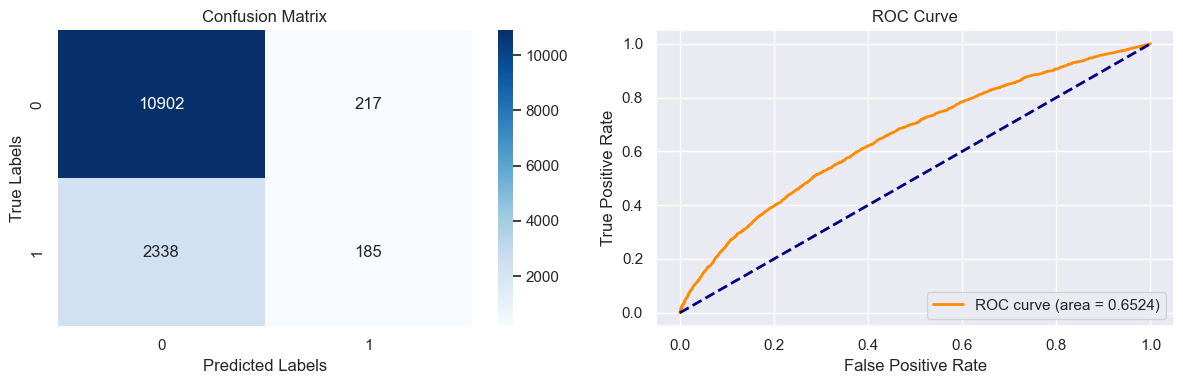

              precision    recall  f1-score   support

           0       0.82      0.98      0.90     11119
           1       0.46      0.07      0.13      2523

    accuracy                           0.81     13642
   macro avg       0.64      0.53      0.51     13642
weighted avg       0.76      0.81      0.75     13642

[ X_train_undersampled_rus  |  y_train_undersampled_rus ]
RandomUnderSampler
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters:  {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}
Score:  0.7591995308605777


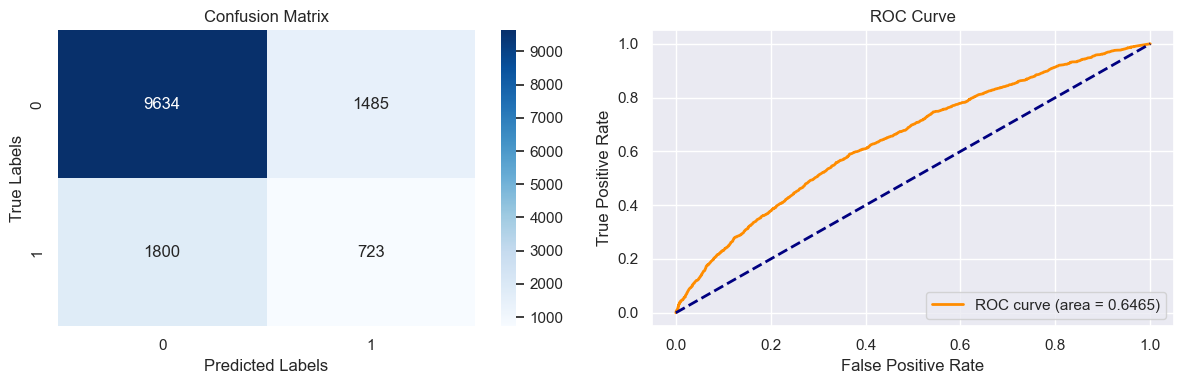

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     11119
           1       0.33      0.29      0.31      2523

    accuracy                           0.76     13642
   macro avg       0.59      0.58      0.58     13642
weighted avg       0.75      0.76      0.75     13642

[ X_train_oversampled_ros  |  y_train_oversampled_ros ]
RandomOverSampler
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters:  {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}
Score:  0.7719542589063187


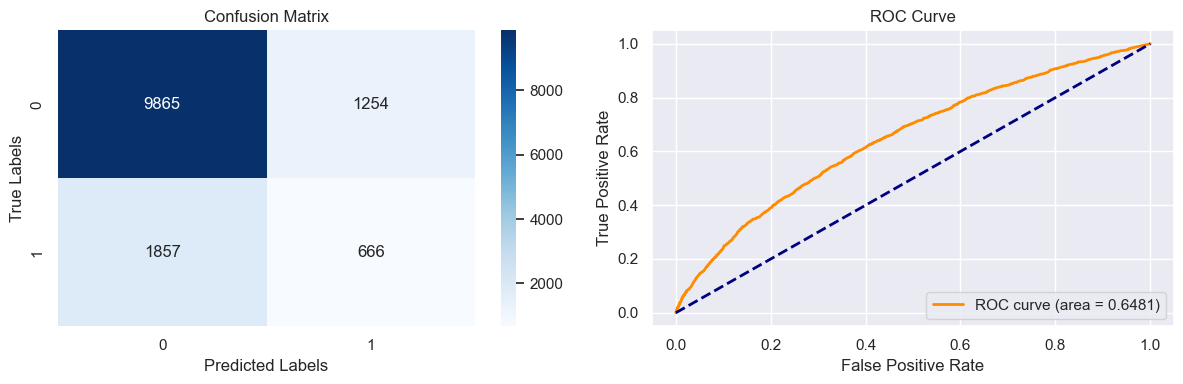

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     11119
           1       0.35      0.26      0.30      2523

    accuracy                           0.77     13642
   macro avg       0.59      0.58      0.58     13642
weighted avg       0.75      0.77      0.76     13642



In [137]:
# Listas de los nombres de variables a iterar
x_names_dtype = ['X_train_processed_df', 'X_train_undersampled_rus', 'X_train_oversampled_ros']
y_names_dtype = ['y_train3', 'y_train_undersampled_rus', 'y_train_oversampled_ros']
data_types = ['Data_Original', 'RandomUnderSampler','RandomOverSampler']

# Acceso a las variable usando locals()
i = 0

modelo_nm = 'RF'

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'bootstrap': [True, False]
}

# Iteración sobre el tipo de Dataset y la técnica de balanceo aplicada: original, undersampled_rus y oversampled_ros
for x,y in zip(x_names_dtype,y_names_dtype):
    X_train_load = locals()[x]
    y_train_load = locals()[y]
    print('[', x,' | ', y, ']')
    print(data_types[i])
    rf = RandomForestClassifier(max_depth=10, random_state=42, class_weight="balanced")
    best_params = grid_searching(rf, X_train_load, y_train_load, param_grid)
    rf_best = RandomForestClassifier(random_state=42, **best_params)
    dict_dtype_report[modelo_nm+'_'+data_types[i]], dict_dtype_auc[modelo_nm+'_'+data_types[i]] = plot_model_performance(rf_best, X_train_load, y_train_load, X_test_processed_df, y_test3, data_types[i])
    
    i +=1


### 8.4.2 XGBoost

[ X_train_processed_df  |  y_train3 ]
Data Original
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': None}
Score:  0.817108928309632


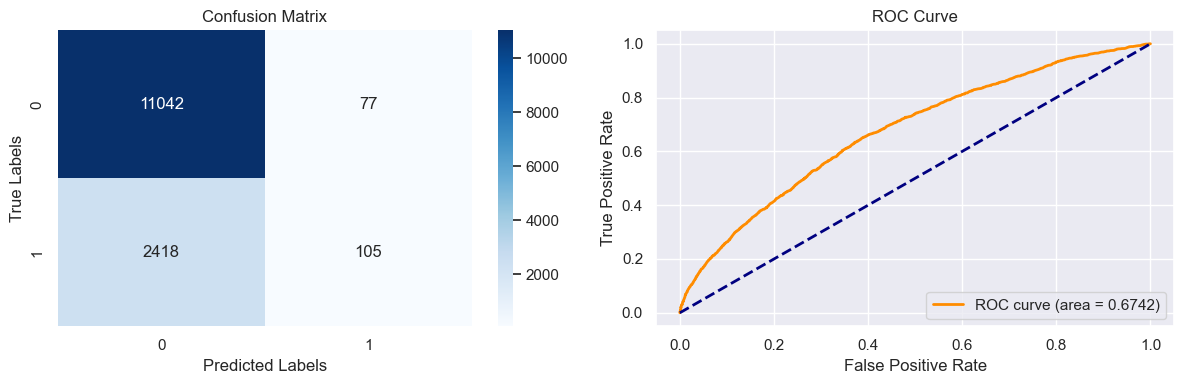

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11119
           1       0.58      0.04      0.08      2523

    accuracy                           0.82     13642
   macro avg       0.70      0.52      0.49     13642
weighted avg       0.78      0.82      0.75     13642


[ X_train_undersampled_rus  |  y_train_undersampled_rus ]
RandomUnderSampler
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': None}
Score:  0.79563113912916


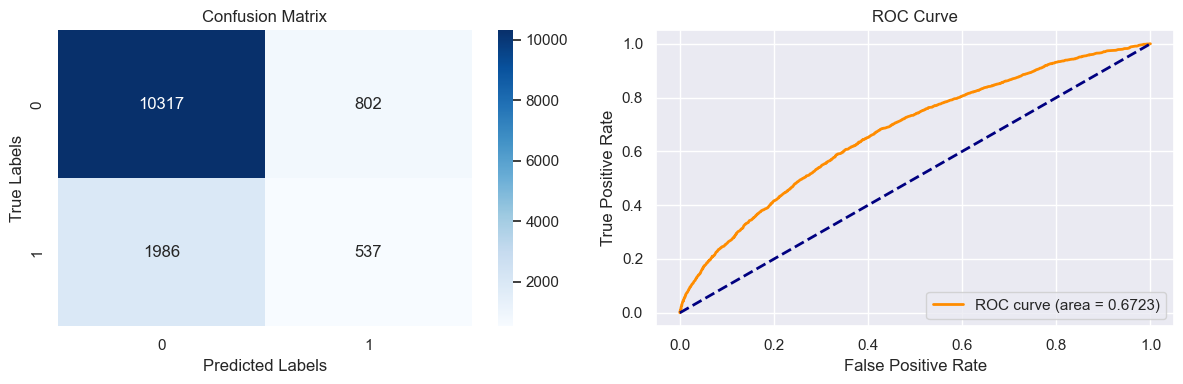

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11119
           1       0.40      0.21      0.28      2523

    accuracy                           0.80     13642
   macro avg       0.62      0.57      0.58     13642
weighted avg       0.76      0.80      0.77     13642


[ X_train_oversampled_ros  |  y_train_oversampled_ros ]
RandomOverSampler
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': None}
Score:  0.7995895030054244


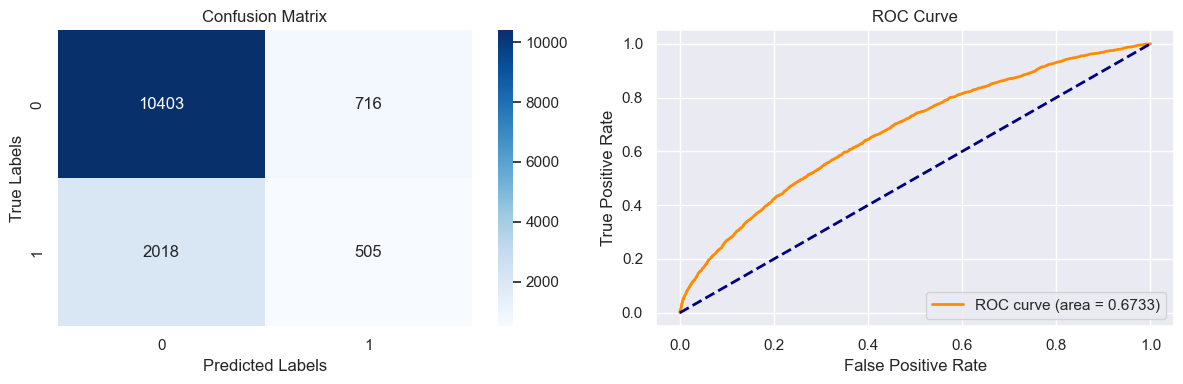

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     11119
           1       0.41      0.20      0.27      2523

    accuracy                           0.80     13642
   macro avg       0.63      0.57      0.58     13642
weighted avg       0.76      0.80      0.77     13642




In [138]:
# Listas de los nombres de variables a iterar
x_names_dtype = ['X_train_processed_df', 'X_train_undersampled_rus', 'X_train_oversampled_ros']
y_names_dtype = ['y_train3', 'y_train_undersampled_rus', 'y_train_oversampled_ros']
data_types = ['Data Original', 'RandomUnderSampler','RandomOverSampler']


modelo_nm = 'XG'
# Acceso a las variable usando locals()
i = 0

param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'scale_pos_weight':[None, 4.44]
}

# Iteración sobre el tipo de Dataset y la técnica de balanceo aplicada: original, undersampled_rus y oversampled_ros
for x,y in zip(x_names_dtype,y_names_dtype):
    X_train_load = locals()[x]
    y_train_load = locals()[y]
    print('[', x,' | ', y, ']')
    print(data_types[i])
    xg = xgb.XGBClassifier(random_state=42,max_depth=10)
    best_params = grid_searching(xg, X_train_load, y_train_load, param_grid)
    xg_best = xgb.XGBClassifier(random_state=42, **best_params)
    dict_dtype_report[modelo_nm+'_'+data_types[i]], dict_dtype_auc[modelo_nm+'_'+data_types[i]]  = plot_model_performance(xg_best, X_train_load, y_train_load, X_test_processed_df, y_test3, data_types[i])
    print()
    i +=1

### 8.4.3 Logistic Regression

[ X_train_processed_df  |  y_train3 ]
Data Original
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:  {'C': 1, 'penalty': 'l2'}
Score:  0.8151297463714998


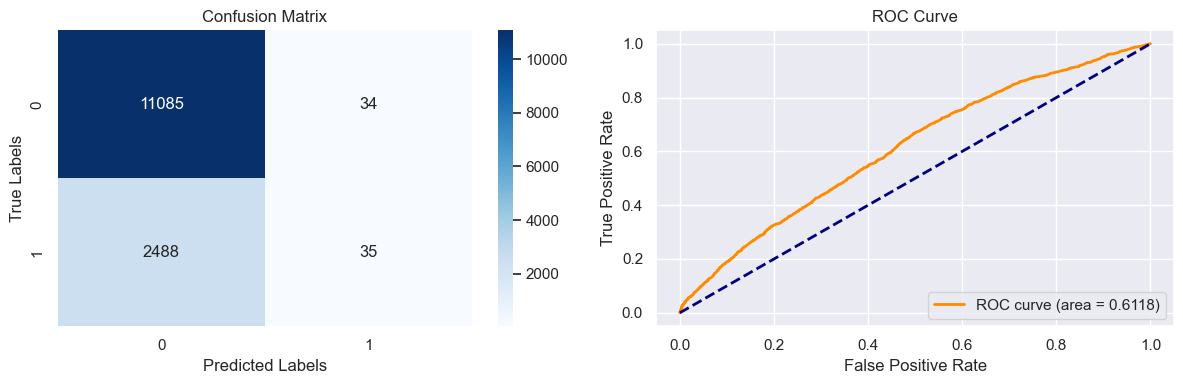

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     11119
           1       0.51      0.01      0.03      2523

    accuracy                           0.82     13642
   macro avg       0.66      0.51      0.46     13642
weighted avg       0.76      0.82      0.74     13642


[ X_train_undersampled_rus  |  y_train_undersampled_rus ]
RandomUnderSampler
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Score:  0.8022284122562674


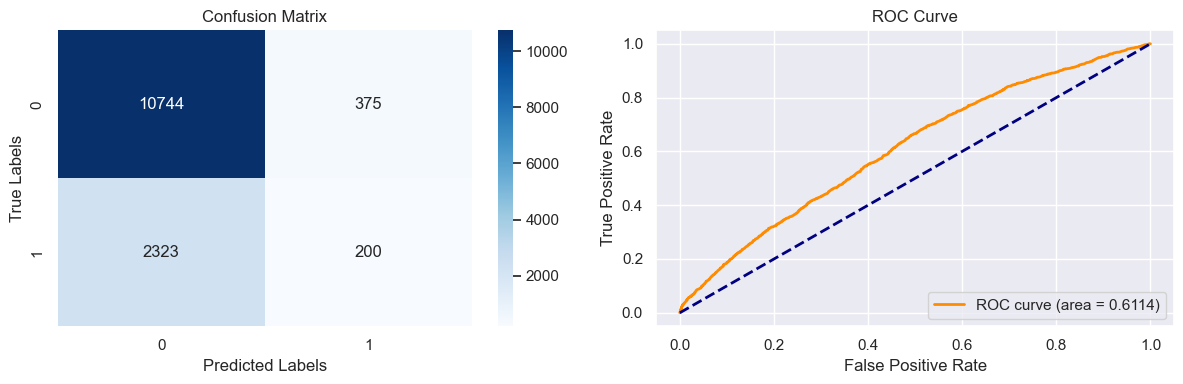

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11119
           1       0.35      0.08      0.13      2523

    accuracy                           0.80     13642
   macro avg       0.59      0.52      0.51     13642
weighted avg       0.73      0.80      0.75     13642


[ X_train_oversampled_ros  |  y_train_oversampled_ros ]
RandomOverSampler
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:  {'C': 1, 'penalty': 'l2'}
Score:  0.802301715291013


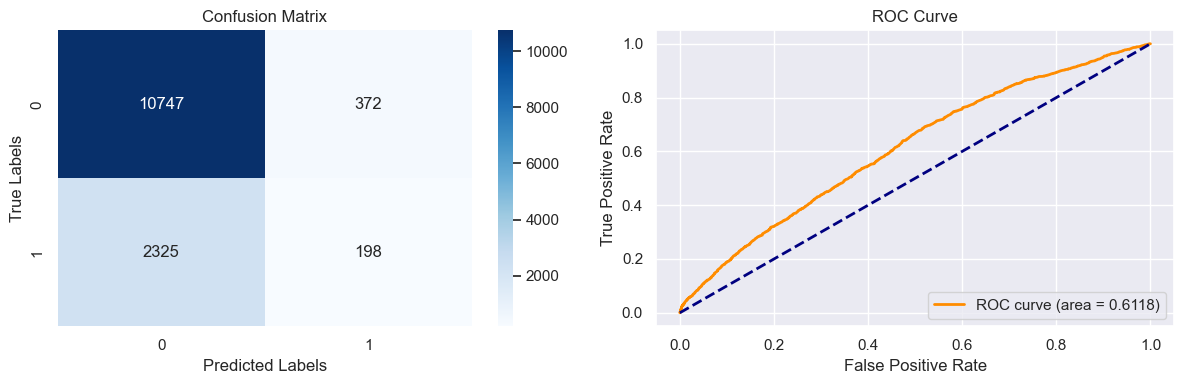

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11119
           1       0.35      0.08      0.13      2523

    accuracy                           0.80     13642
   macro avg       0.58      0.52      0.51     13642
weighted avg       0.73      0.80      0.75     13642




In [139]:
# Listas de los nombres de variables a iterar
x_names_dtype = ['X_train_processed_df', 'X_train_undersampled_rus', 'X_train_oversampled_ros']
y_names_dtype = ['y_train3', 'y_train_undersampled_rus', 'y_train_oversampled_ros']
data_types = ['Data Original', 'RandomUnderSampler','RandomOverSampler']


modelo_nm = 'LR'
# Acceso a las variable usando locals()
i = 0

param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty: 'l1' Lasso, 'l2' Ridge
    'C': [0.1, 1, 10]  # Regularization parameter (inverso de regularization strength)
}

# Iteración sobre el tipo de Dataset y la técnica de balanceo aplicada: original, undersampled_rus y oversampled_ros
for x,y in zip(x_names_dtype,y_names_dtype):
    X_train_load = locals()[x]
    y_train_load = locals()[y]
    print('[', x,' | ', y, ']')
    print(data_types[i])
    lr = LogisticRegression(random_state=42)
    best_params = grid_searching(lr, X_train_load, y_train_load, param_grid)
    lr_best = LogisticRegression(random_state=42, **best_params)
    dict_dtype_report[modelo_nm+'_'+data_types[i]], dict_dtype_auc[modelo_nm+'_'+data_types[i]]  = plot_model_performance(lr_best, X_train_load, y_train_load, X_test_processed_df, y_test3, data_types[i])
    print()
    i +=1

## 8.5 Results Evaluation

In [140]:
# Lista vacía para almacenar resultados
resultados = []

# Iteración sobre el diccionario y extrayendo métricas
for modelo, reporte_df in dict_dtype_report.items():
    precision_true = reporte_df.loc['1', 'precision']
    f1_true = reporte_df.loc['1', 'f1-score']
    recall_true = reporte_df.loc['1', 'recall']
    precision_false = reporte_df.loc['0', 'precision']
    f1_false = reporte_df.loc['0', 'f1-score']
    recall_false = reporte_df.loc['0', 'recall']
    resultados.append({
        'Modelo': modelo,
        'Precisión para True': precision_true,
        'F1 Score para True': f1_true,
        'Recall para True': recall_true,
        'Precisión para False': precision_false,
        'F1 Score para False': f1_false,
        'Recall para False': recall_false
    })

# DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# DataFrame ordenado por precisión para los valores True en orden descendente
resultados_df = resultados_df.sort_values(by='F1 Score para False', ascending=False).reset_index(drop=True)

# Convertir el dict de AUc en DataFrame
df_auc = pd.DataFrame(dict_dtype_auc, index=['AUC']).T.reset_index()

df_final_result = pd.merge(resultados_df, df_auc, left_on='Modelo', right_on='index').drop(columns='index')
df_final_result

,Modelo,Precisión para True,F1 Score para True,Recall para True,Precisión para False,F1 Score para False,Recall para False,AUC
0,XG_Data Original,0.576923,0.077634,0.041617,0.820357,0.898491,0.993075,0.674225
1,LR_Data Original,0.507246,0.027006,0.013872,0.816695,0.897862,0.996942,0.611802
2,RF_Data_Original,0.460199,0.126496,0.073325,0.823414,0.895111,0.980484,0.652360
3,LR_RandomOverSampler,0.347368,0.128031,0.078478,0.822139,0.888512,0.966544,0.611790
4,LR_RandomUnderSampler,0.347826,0.129116,0.079271,0.822224,0.888448,0.966274,0.611372
5,XG_RandomOverSampler,0.413595,0.269765,0.200159,0.837533,0.883857,0.935606,0.673263
6,XG_RandomUnderSampler,0.401046,0.278094,0.212842,0.838576,0.880967,0.927871,0.672281
7,RF_RandomOverSampler,0.346875,0.299797,0.263971,0.841580,0.863798,0.887220,0.648082
8,RF_RandomUnderSampler,0.327446,0.305644,0.286564,0.842575,0.854343,0.866445,0.646544


* Precision para Verdaderos Positivos (Precisión para Vuelos Retrasados): Indica la proporción de vuelos predichos como retrasados que realmente estaban retrasados. Una precisión más alta significa menos falsos positivos.

* F1-Score para Verdaderos Positivos (Puntuación F1 para Vuelos Retrasados): Es la media armónica de la precisión y el Recall para los vuelos retrasados. Equilibra tanto los falsos positivos como los falsos negativos.

* Recall para Verdaderos Positivos (Recall para Vuelos Retrasados): Indica la proporción de vuelos retrasados reales que se predijeron correctamente como retrasados. Un Recall más alto significa menos falsos negativos. Esta métrica es muy importante para evitar predicciones "negativas", ya que esto afectaría la gestión de los vuelos y dificultaría un plan de acción oportuno.  ej: modelo dice que no habrá retraso, realidad: si hubo retraso. El impacto puede ser alto para la aerolínea en cuanto a la insatisfacción de los pasajeros y el slot que tiene para operar.

* Precision para Falsos Positivos (Precisión para Vuelos Puntuales): Indica la proporción de vuelos predichos como puntuales que realmente estaban en hora. Una precisión más alta significa menos falsos positivos para los vuelos puntuales.

* Puntuación F1 para Falsos Positivos (Puntuación F1 para Vuelos Puntuales): Es la media armónica de la precisión y el Recall para los vuelos puntuales. Equilibra tanto los falsos positivos como los falsos negativos para los vuelos puntuales.

* Recall para Falsos Positivos (Recall para Vuelos Puntuales): Indica la proporción de vuelos puntuales reales que se predijeron correctamente como puntuales. Un Recall más alto significa menos falsos negativos para los vuelos puntuales.

* AUC (Área bajo la Curva Característica de Operación del Receptor): Mide la capacidad del modelo para distinguir entre clases. Un AUC más alto indica una mejor capacidad para discriminar entre vuelos retrasados y vuelos puntuales.

Predecir los retrasos de vuelos con precisión es crucial, por lo que se podría dar prioridad a las métricas relacionadas con los vuelos retrasados (precisión, recall y F1-score para Verdaderos Positivos). 
El recall para la clase positiva es una buena métrica para evitar falsos negativos, adicionalmente F1-score y AUC son métricas importantes para mantener una evaluación equilibrada entre las predicciones de clase.

Por ello el modelo seleccionado es el construido inicialmente por el DS **XG_Boost with Balance**, ya que se destaca por tener un recall adecuado (0.69) y recall (0.99) para vuelos retrasados, lo que indica su capacidad para identificar de manera precisa y exhaustiva los vuelos que realmente están retrasados. La elección de este modelo prioriza la capacidad de identificar de manera confiable los vuelos retrasados (minimizando falsos negativos) y reducir los falsos positivos para vuelos puntuales.

# 9. Final Model Selected

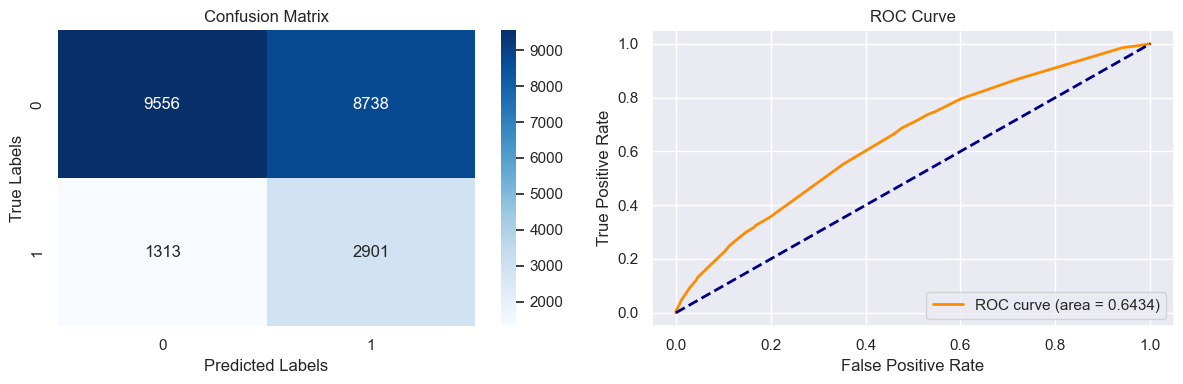

,precision,recall,f1-score,support
0,0.879198,0.522357,0.655351,18294.000000
1,0.249248,0.688420,0.365988,4214.000000
accuracy,0.553448,0.553448,0.553448,0.553448
macro avg,0.564223,0.605388,0.510669,22508.000000
weighted avg,0.761257,0.553448,0.601176,22508.000000


In [144]:
# Balance Data
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1

top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)


y_pred = xgb_model_2.predict(x_test2)
y_pred_prob = xgb_model_2.predict_proba(x_test2)[:, 1]

# Graficar l amatriz de confusión
conf_matrix = confusion_matrix(y_test2, y_pred)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Graficar la curva ROc
fpr, tpr, _ = roc_curve(y_test2, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

dict_dtype_report_fin = classification_report(y_test2, y_pred, output_dict=True)

df_report_fin = pd.DataFrame(dict_dtype_report_fin).transpose()

df_report_fin